In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('../../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Experiments

#### Imports

In [2]:
import numpy as np
import torch
import time
import pytorch_lightning as pl
from pytorch_lightning import loggers
import config
from utils.Visual import draw_plot

/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# 1. Hyperparameter Tuning

*see coresponding notebook!*

# 2. Adversarial Training

In [20]:
##############################################################################################################
##############################################################################################################
##############################################################################################################
from utils.TrainHelper import TrainHelper, get_all_models_data
from attacks.pgd import ProjectedGradientDescent
from classification.models.M5 import M5PLModule

# define hyperparameters
hparams = {
    "batch_size": 64,
    "learning_rate": 3e-4,
    "weight_decay": 0.001,
    "lr_decay": 0.95,
    "epochs": 2
}

# define attack configs
attack_configs = [
                  {"ATTACK_CLASS": ProjectedGradientDescent, 
                   "ATTACK_ARGS": {"norm":["inf"], 
                                   "epsilon":[
                                      {"SAMPLING_MODE": "log_batch", "l": 1e-4, "u": 0.5},
                                      {"SAMPLING_MODE": "log", "l": 1e-4, "u": 0.5},
                                     ]
                                 },
                   "META": {}
                   }, 
                  ]

th = TrainHelper()
th.run(M5PLModule, hparams, attack_configs, save_epochs = [10, 25, 50, 100])
##############################################################################################################
##############################################################################################################
##############################################################################################################

loaded!
Training Models with Attack ProjectedGradientDescent (1 of 1)
------------------------------------------------------------
Trainig model 1/2
------------------------------------------------------------
Loading cached train data from /nfs/students/summer-term-2020/project-4/data/data_8k
Loading cached val data from /nfs/students/summer-term-2020/project-4/data/data_8k


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type         | Params
--------------------------------------------
0  | model          | M5           | 555 K 
1  | model.model    | Sequential   | 555 K 
2  | model.model.0  | Conv1d       | 10 K  
3  | model.model.1  | BatchNorm1d  | 256   
4  | model.model.2  | MaxPool1d    | 0     
5  | model.model.3  | Dropout      | 0     
6  | model.model.4  | Conv1d       | 49 K  
7  | model.model.5  | BatchNorm1d  | 256   
8  | model.model.6  | MaxPool1d    | 0     
9  | model.model.7  | Dropout      | 0     
10 | mod

Val-Acc=0.03793716656787196


/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.8239478363959691


Val-Acc=0.8221695317131001


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name           | Type         | Params
--------------------------------------------
0  | model          | M5           | 555 K 
1  | model.model    | Sequential   | 555 K 
2  | model.model.0  | Conv1d       | 10 K  
3  | model.model.1  | BatchNorm1d  | 256   
4  | model.model.2  | MaxPool1d    | 0     
5  | model.model.3  | Dropout      | 0     
6  | model.model.4  | Conv1d       | 49 K  
7  | model.model.5  | BatchNorm1d  | 256   
8  | model.model.6  | MaxPool1d    | 0     
9  | model.model.7  | Dropout      | 0     
10 | mod


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/M5/M5_attack_ProjectedGradientDescent_v51.p"
------------------------------------------------------------
Trainig model 2/2
------------------------------------------------------------


/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.03793716656787196


Val-Acc=0.8203912270302312


Val-Acc=0.7949021932424422

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/M5/M5_attack_ProjectedGradientDescent_v52.p"
Trained Models:
['/nfs/students/summer-term-2020/project-4/SAVED_MODELS/M5/M5_attack_ProjectedGradientDescent_v51.p', '/nfs/students/summer-term-2020/project-4/SAVED_MODELS/M5/M5_attack_ProjectedGradientDescent_v52.p']


# 3. Robustness Comparison

In [21]:
##############################################################################################################
##############################################################################################################
##############################################################################################################

from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
from attacks.FGA_Batch import fast_gradient_attack
from attacks.pgd import ProjectedGradientDescent

exp_config = [{
              "attack_fn": ProjectedGradientDescent, 
              "attack_arg": {"norm":["inf"], "epsilon": [0, 0.0001, 0.0002, 0.0005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]},
              "meta": {"key_result":"success_rate", "key_config":"epsilon", "title":"FGSM"}
             },
            {
            "attack_fn": ProjectedGradientDescent, 
            "attack_arg": {"norm":["2"], "epsilon": [0, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]},
            "meta": {"key_result":"success_rate", "key_config":"epsilon", "title":"FGA L2"}
            },
            {
            "attack_fn": ProjectedGradientDescent, 
            "attack_arg": {"norm":["1"], "epsilon": [100, 200, 500, 1000, 2000, 5000, 1e4, 2e4, 5e4, 1e5]},
            "meta": {"key_result":"success_rate", "key_config":"epsilon", "title":"FGA L1"}
            }]

# uncomment this if you want to create a new experiment instead!
#experiment = RobustnessExperiment(exp_config, title="EVALUATION_STANDARD")
experiment = load_experiment(exp_folder = "0001_EVALUATION_STANDARD")

#experiment.run("./1592000682.p", M5PLModule) #20 epochs normal training with hparams above
experiment.run("/nfs/students/summer-term-2020/project-4/SAVED_MODELS/M5/M5_attack_ProjectedGradientDescent_v8_epoch_25.p", M5PLModule) #5 epochs adv training with hparams above
##############################################################################################################
##############################################################################################################
##############################################################################################################

Loaded model 0001_EVALUATION_STANDARD
Loading cached train data from /nfs/students/summer-term-2020/project-4/data/data_8k
Loading cached val data from /nfs/students/summer-term-2020/project-4/data/data_8k


Running experiment on model M5_attack_ProjectedGradientDescent_v8_epoch_25.p

Perform Attack #1/3: FGSM
Attack FGSM has already been performed for model M5_attack_ProjectedGradientDescent_v8_epoch_25.p - skipping.

Perform Attack #2/3: FGA L2
Attack FGA L2 has already been performed for model M5_attack_ProjectedGradientDescent_v8_epoch_25.p - skipping.

Perform Attack #3/3: FGA L1
Attack FGA L1 has already been performed for model M5_attack_ProjectedGradientDescent_v8_epoch_25.p - skipping.


# Further Analyzis

### Show all evaluated models

In [5]:
experiment.show_evaluated_models()

['1592000682.p',
 'M5_attack_ProjectedGradientDescent_v7.p',
 'M5_attack_ProjectedGradientDescent_v7_epoch_25.p',
 'M5_attack_ProjectedGradientDescent_v7_epoch_50.p',
 'M5_attack_ProjectedGradientDescent_v13.p',
 'M5_attack_ProjectedGradientDescent_v34.p',
 'M5_attack_ProjectedGradientDescent_v35.p',
 'M5_attack_ProjectedGradientDescent_v39.p',
 'M5_attack_ProjectedGradientDescent_v8_epoch_25.p']

### Which Model performs best on Robustness-Evaluation?

In [6]:
experiment.show_best_models(metric = "success_rate", best_n=1, limit_eps=6)


Attack = FGSM:
[(0.10773680404916847, 'M5_attack_ProjectedGradientDescent_v13.p')]

Attack = FGA L2:
[(0.6305133767172812, 'M5_attack_ProjectedGradientDescent_v13.p')]

Attack = FGA L1:
[(0.6876355748373102, 'M5_attack_ProjectedGradientDescent_v13.p')]


### Print info of best model

In [7]:
get_all_models_data()["M5"]["M5_attack_ProjectedGradientDescent_v13.p"]

{'path': '/nfs/students/summer-term-2020/project-4/SAVED_MODELS/M5/M5_attack_ProjectedGradientDescent_v13.p',
 'hparams': {'batch_size': 64,
  'learning_rate': 0.0003,
  'weight_decay': 0.001,
  'lr_decay': 0.95,
  'epochs': 100,
  'p_drop': 0},
 'attack_args': {'norm': '2', 'epsilon': 20},
 'final_val_acc': 0.8197984588026082}

### Compare

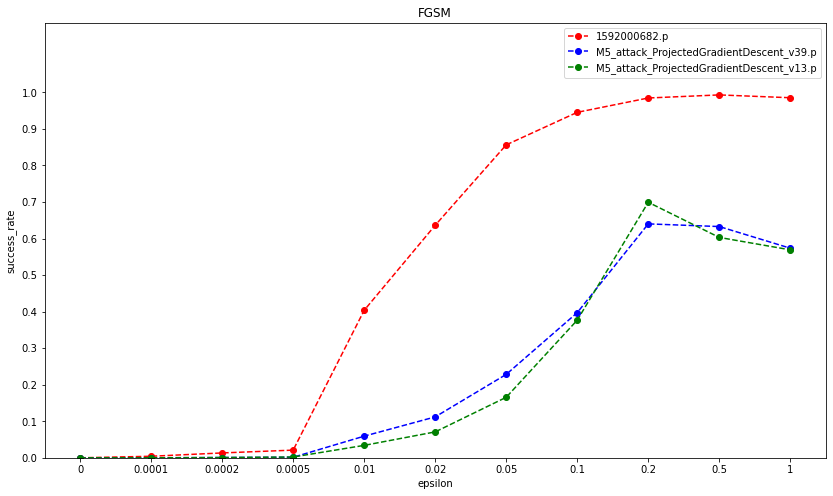

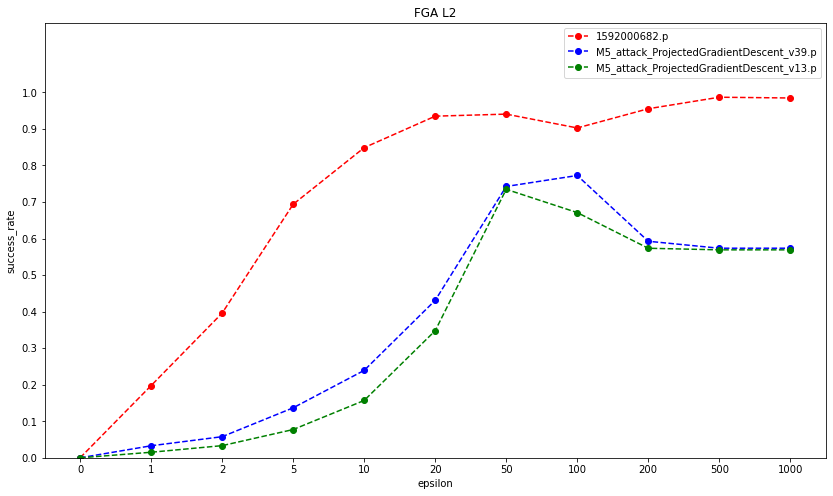

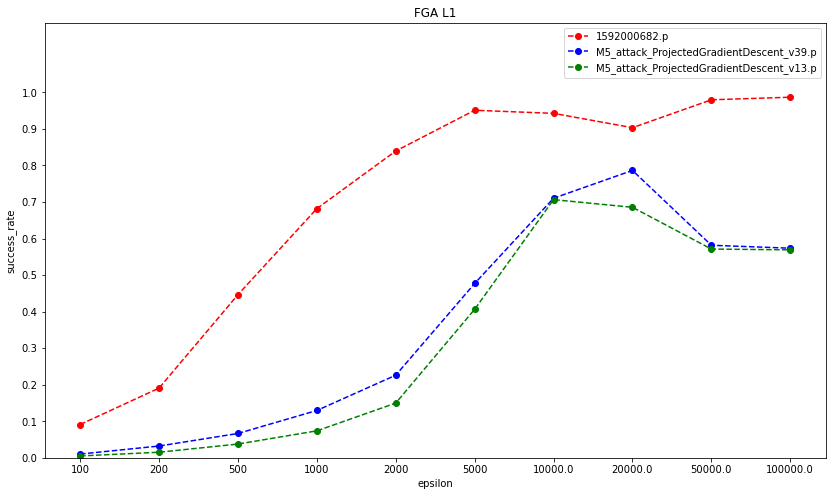

In [8]:
experiment.compare(config_key = "epsilon", results_key = "success_rate", models=['1592000682.p',
                                                                                 "M5_attack_ProjectedGradientDescent_v39.p",
                                                                                 "M5_attack_ProjectedGradientDescent_v13.p",
                                                                                ])